In [2]:
import datetime as dt
import math
import netCDF4
import numpy as np
import os
import io
import pandas as pd
import re
import matplotlib.pyplot as plt
import csv
import netCDF4 as n
from netCDF4 import Dataset
import requests
import matplotlib as mpl
import matplotlib.colors
import matplotlib.ticker as ticker
import matplotlib.tri as tri
from ast import literal_eval
from itertools import cycle
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from scipy import stats
from scipy.stats import pearsonr
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns



# Plt. 4 - Fall Velocities and Hygroscopic Growth

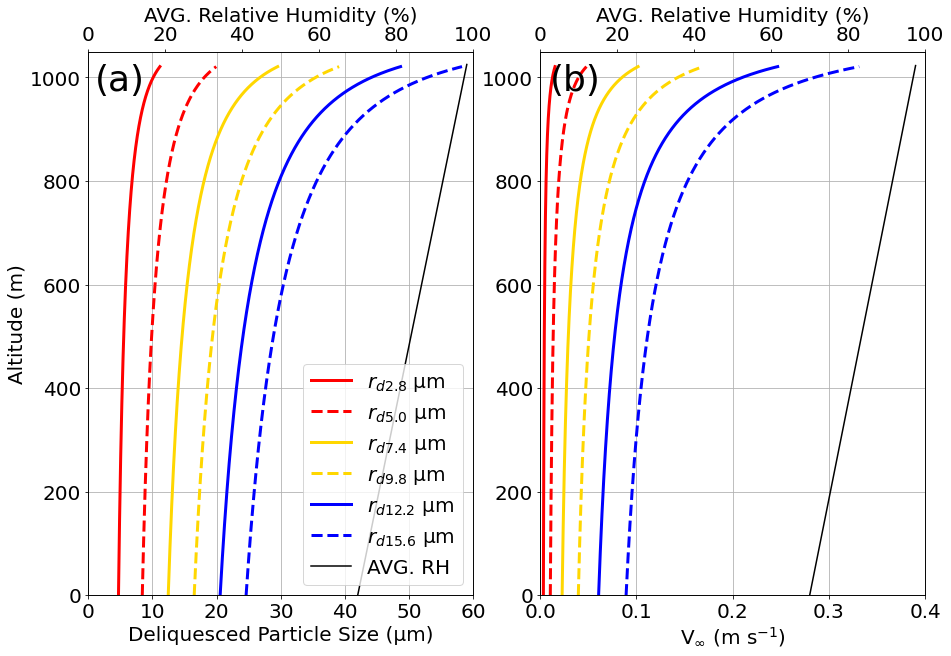

In [3]:
df = pd.read_csv('plt4_data.csv')
fig = plt.figure(figsize = [15, 10])
gs = gridspec.GridSpec(1, 17)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, :8])
ax2 = plt.subplot(gs[0, 9:])

cols = ['r28um', 'r50um', 'r74um',
       'r98um', 'r122um', 'r156um']
colors = ['red', 'red', 'gold', 'gold', 'blue', 'blue']
labels = ['$r_{d2.8}$ \u03BCm', '$r_{d5.0}$ \u03BCm','$r_{d7.4}$ \u03BCm','$r_{d9.8}$ \u03BCm', '$r_{d12.2}$ \u03BCm', '$r_{d15.6}$ \u03BCm']
f = 16
g = 12
 
ax1a = ax1.twiny()
ax1a.set_xlim(0, 100)
ax1a.tick_params(axis = 'x', labelsize = 20)
ax1a.set_xlabel('AVG. Relative Humidity (%)',fontsize = 20)
x = np.linspace(42, 59, 20)
for i in range(0, 3):  
    ax1.plot(df[cols[i*2]], df['alts'], color = colors[i*2], label = labels[i*2], linestyle = '-', linewidth = 3)    
    ax1.plot(df[cols[(i*2)+1]], df['alts'], color = colors[(i*2)+1], label = labels[(i*2)+1], linestyle = '--', linewidth = 3) 
ax1.plot(x, ((x-42)*60.3), label = 'AVG. RH', color ='black')   
ax1.legend(fontsize = 20, loc = 'lower right') 
ax1.annotate('(a)', xy=[1, 975], fontsize =36, c= 'black')
ax1.set_ylim(0, 1050)
ax1.set_xlim(0, 60)
ax1.tick_params(axis = 'x', labelsize = 20)
ax1.tick_params(axis = 'y', labelsize = 20)
ax1.set_ylabel('Altitude (m)',fontsize = 20)
ax1.set_xlabel('Deliquesced Particle Size (\u03BCm)',fontsize = 20)
ax1.grid()

############ PLOT B #########################
cols = ['bd_fallv_28um', 'bd_fallv_50um', 'bd_fallv_74um',
       'bd_fallv_98um', 'bd_fallv_122um', 'bd_fallv_156um']
colors = ['red', 'red', 'gold', 'gold', 'blue', 'blue']
labels = ['$r_{d2.8}$ \u03BCm', '$r_{d5.0}$ \u03BCm','$r_{d7.4}$ \u03BCm','$r_{d9.8}$ \u03BCm', '$r_{d12.2}$ \u03BCm', '$r_{d15.6}$ \u03BCm']
lines = ['-', '--', '-', '--', '-', '--']

x = np.linspace(.28, .39, 20)
for i in np.arange(0, 3):
    ax2.plot(df[cols[i*2]], df['alts'], color = colors[i*2], label = labels[i*2], linestyle = '-', linewidth = 3)    
    ax2.plot(df[cols[(i*2)+1]], df['alts'], color = colors[(i*2)+1], label = labels[(i*2)+1], linestyle = '--', linewidth = 3) 
ax2.plot(x, ((x-.28)*9300), label = 'AVG. RH', color ='black')
ax2.annotate('(b)', xy=[.01, 975], fontsize =36, c= 'black')
ax2.set_ylim(0, 1050)
ax2.set_xlim(0, .4)
ax2.tick_params(axis = 'x', labelsize = 20)
ax2.tick_params(axis = 'y', labelsize = 20)
ax2.set_xlabel('V$_{\u221E}$ (m $\mathrm{s^{-1})}$',fontsize = 20)

ax2a = ax2.twiny()
ax2a.set_xlim(0, 100)
ax2a.tick_params(axis = 'x', labelsize = 20)
ax2a.set_xlabel('AVG. Relative Humidity (%)',fontsize = 20)
ax2.grid()

# Plt 5: Open-Ocean vs. Coastal SDs

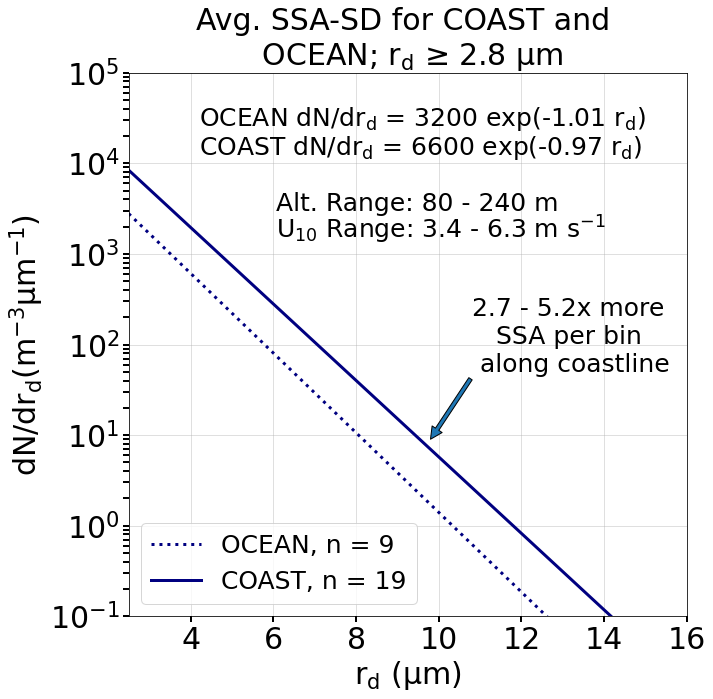

In [4]:
plt5_ocn = pd.read_csv('plt5_ocn_data.csv')
plt5_cst = pd.read_csv('plt5_cst_data.csv')
plt5_ocn['y_vals'] = plt5_ocn['y_vals'].apply(literal_eval)
plt5_cst['y_vals'] = plt5_cst['y_vals'].apply(literal_eval)

difflist = []
for i in np.arange(0, len(plt5_ocn['y_vals'][0])): 
    difflist.append(plt5_cst['y_vals'][0][i]/plt5_ocn['y_vals'][0][i])

x = np.linspace(0, 16, 2000)    
wind = plt5_ocn['altitude'][0]
wind2 = plt5_cst['altitude'][0]
ns1 = plt5_ocn['numsamps'][0]
ns2 = plt5_cst['numsamps'][0]
fc1 = plt5_ocn['r26'][0]
dc1 = plt5_ocn['decay_coefficient'][0]
fc2 = plt5_cst['r26'][0]
dc2 = plt5_cst['decay_coefficient'][0]
plt.figure(figsize = (10, 10))  
plt.plot(x, plt5_ocn['y_vals'][0], linewidth = 3, label = "OCEAN, n = " + str(ns1), c = 'navy', linestyle = ':')
plt.plot(x, plt5_cst['y_vals'][0], linewidth = 3, label = "COAST, n = " + str(ns2), c = 'navy')
plt.annotate('OCEAN dN/d$\mathrm{r_d}$ = %d exp(%.2f $\mathrm{r_d}$)'%(np.round_(fc1, -2), dc1),xy=(4.2,26000), size = 25)
plt.annotate('COAST dN/d$\mathrm{r_d}$ = %d exp(%.2f $\mathrm{r_d}$)'%(np.round_(fc2, -2), dc2),xy=(4.2,12500), size =25)     
plt.title('Avg. SSA-SD for COAST and \n OCEAN; $\mathrm{r_d}$ \u2265 2.8 \u03BCm', size = 30)
plt.ylabel('dN/d$\mathrm{r_d}$($\mathrm{m^{-3} \u03BCm^{-1}}$)', size = 30)
plt.xlabel('$\mathrm{r_d}$ (\u03BCm)', size = 30)
plt.annotate('U$_{10}$ Range: 3.4 - 6.3 $\mathrm{m\ s^{-1}}$', xy=(6.05, 1500), size=25, verticalalignment='baseline')
plt.annotate('Alt. Range: 80 - 240 m', xy=(6.05, 3000), size=25, verticalalignment='baseline')
plt.xlim(left=2.5, right=16) 
plt.ylim(bottom=0.1, top=100000)
plt.annotate(f'{np.round_(min(difflist), 1)} - {np.round_(max(difflist), 1)}x more \n   SSA per bin \n along coastline',xy=(9.8,9),xytext=(10.8, 50),fontsize =25, arrowprops={})
plt.yscale('log')
plt.yticks(size = 30)
plt.xticks(size = 30)
plt.tick_params('y', length = 6, width = 2)
plt.tick_params('x', length = 6, width = 2)
plt.tick_params('y', which = 'minor', length = 6, width = 2)
plt.legend(loc = 'lower left', fontsize = 25)
plt.grid(alpha = 0.5)
plt.show()

# Plt. 6 - Woodcock vs. COAST vs. OCEAN Inverse Cumulative Concentrations

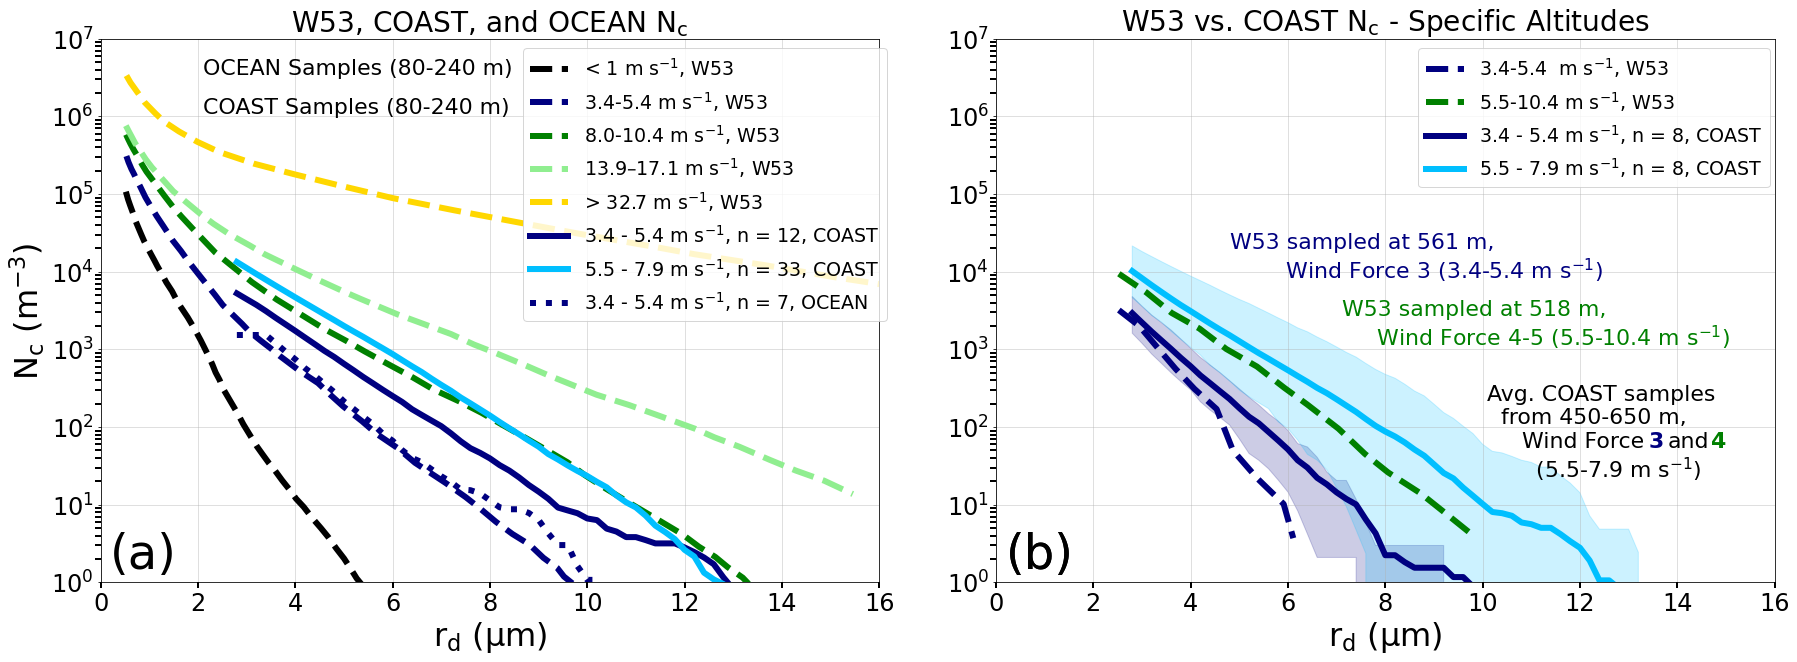

In [5]:
plt6a_cst = pd.read_csv('plt6a_cst_data.csv')
plt6a_ocn = pd.read_csv('plt6a_ocn_data.csv') 
plt6b_cst = pd.read_csv('plt6b_cst_data.csv')
plt6b_minmax = pd.read_csv('plt6b_cst_ranges.csv')
w_49_1 = pd.read_csv('woodcock_49_1.csv')
w_42_3 = pd.read_csv('woodcock_42_3.csv')
w_39_5 = pd.read_csv('woodcock_39_5.csv')
w_35_7 = pd.read_csv('woodcock_35_7.csv')
w_22_12 = pd.read_csv('woodcock_22_12.csv')
woodcock_low_3 = pd.read_csv('woodcock_lowalt_3.csv')
woodcock_low_45 = pd.read_csv('woodcock_lowalt_45.csv')

fig = plt.figure(figsize = [30, 10])
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.15)
ax = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

b = 22
c = 24
d = 28
e = 32
f = 19

colorcycler = cycle(['navy','deepskyblue','darkgoldenrod','green','blue','purple', 'magenta', 'black'])
ax.plot(w_49_1.dry_radius, w_49_1.n_concentration, label='< 1 m s$^{-1}$, W53', color='black', linestyle='--', linewidth=6)
ax.plot(w_42_3.dry_radius, w_42_3.n_concentration, label='3.4-5.4 m s$^{-1}$, W53', color='navy', linestyle='--', linewidth=6)
ax.plot(w_39_5.dry_radius, w_39_5.n_concentration, label='8.0-10.4 m s$^{-1}$, W53', color='green', linestyle='--', linewidth=6)
ax.plot(w_35_7.dry_radius, w_35_7.n_concentration, label='13.9–17.1 m s$^{-1}$, W53', color='lightgreen', linestyle='--', linewidth=6)
ax.plot(w_22_12.dry_radius, w_22_12.n_concentration, label='> 32.7 m s$^{-1}$, W53', color='gold', linestyle='--', linewidth=6)
ax.plot(plt6a_cst['x_34_54_windrange'], plt6a_cst['y_34_54_windrange'], label='3.4 - 5.4 m s$^{-1}$, n = 12, COAST', linewidth=6, color='navy')
ax.plot(plt6a_cst['x_55_79_windrange'], plt6a_cst['y_55_79_windrange'], label='5.5 - 7.9 m s$^{-1}$, n = 33, COAST', linewidth=6,color='deepskyblue')
ax.plot(plt6a_ocn['x_34_54_windrange'], plt6a_ocn['y_34_54_windrange'], label='3.4 - 5.4 m s$^{-1}$, n = 7, OCEAN', linewidth=6, color='navy', linestyle = ':') 
ax.set_yscale('log') 
ax.set_xlim(left=0, right=16) 
ax.set_ylim(bottom=1, top=10000000) 
ax.annotate('OCEAN Samples (80-240 m)', xy=[2.1, 3500000], fontsize = b, color = 'black')
ax.annotate('COAST Samples (80-240 m)', xy=[2.1, 1100000], fontsize = b)
ax.set_ylabel('$\mathdefault{N_c}$ ($\mathdefault{m^{-3}}$)', fontsize = e) # label on y-axis
ax.set_xlabel('$\mathdefault{r_d}$ (\u03BCm)', fontsize = e) # label on x-axis
ax.tick_params(axis='x', length = 6, width = 2,labelsize= c)
ax.tick_params(axis='y', labelsize= c)
ax.tick_params(axis='y', which = 'minor', length = 6, width = 2, labelsize= c)
ax.annotate('(a)', xy=[0.2, 1.5], fontsize =48, c= 'black')
lgd = ax.legend(bbox_to_anchor=(.53,1), loc='upper left', ncol=1, fontsize=f)
ax.grid(alpha = 0.5) 
ax.set_title('W53, COAST, and OCEAN $\mathdefault{N_c}$', fontsize = d)



ax2.plot(woodcock_low_3.dry_radius, woodcock_low_3.raw_cumu, label='3.4-5.4  m s$^{-1}$, W53', color='navy', linestyle='--', linewidth=6)
ax2.plot(woodcock_low_45.dry_radius, woodcock_low_45.raw_cumu, label='5.5-10.4 m s$^{-1}$, W53', color='green', linestyle='--', linewidth=6)
ax2.plot(plt6b_cst['x_34_54_windrange'], plt6b_cst['y_34_54_windrange'], label='3.4 - 5.4 m s$^{-1}$, n = 8, COAST', linewidth=6, color='navy')
ax2.plot(plt6b_cst['x_55_79_windrange'], plt6b_cst['y_55_79_windrange'], label='5.5 - 7.9 m s$^{-1}$, n = 8, COAST', linewidth=6, color='deepskyblue')
ax2.fill_between(plt6b_minmax['x_all'], plt6b_minmax['y_34_54_windrange_min'], plt6b_minmax['y_34_54_windrange_max'], color = 'navy', alpha = 0.2)   
ax2.fill_between(plt6b_minmax['x_all'], plt6b_minmax['y_55_79_windrange_min'], plt6b_minmax['y_55_79_windrange_max'], color = 'deepskyblue', alpha = 0.2)
ax2.set_yscale('log') # log scale on y-axis
ax2.set_ylim(bottom=1, top=10000000) 
ax2.set_xlim(left=0, right=16) # limits on the x-axis
ax2.annotate('Avg. COAST samples\n  from 450-650 m,\n     Wind Force\n       (5.5-7.9 m s$^{-1}$)', xy=[9.1+1, 22], fontsize =b, c= 'black')
ax2.annotate('3', xy=[12.4+1, 55],weight='bold',fontsize =b, c= 'navy')
ax2.annotate('and', xy=[12.8+1, 55], fontsize =b, c= 'black')
ax2.annotate('4', xy=[13.7+1, 55], weight='bold',fontsize =b, c= 'green')
ax2.annotate('W53 sampled at 561 m, \n        Wind Force 3 (3.4-5.4 m s$^{-1}$)', xy=[4.8, 8000], fontsize = b, c= 'navy')
ax2.annotate('W53 sampled at 518 m, \n     Wind Force 4-5 (5.5-10.4 m s$^{-1}$)', xy=[7.1, 1100], fontsize = b, c= 'green')
ax2.annotate('(b)', xy=[0.2, 1.5], fontsize =48, c= 'black')
ax2.annotate('(b)', xy=[0.2, 1.5], fontsize =48, c= 'black')
ax2.set_xlabel('$\mathdefault{r_d}$ (\u03BCm)', fontsize = e) # label on x-axis
ax2.tick_params(axis='x', length = 6, width = 2,labelsize= c)
ax2.tick_params(axis='y', labelsize= c)
ax2.tick_params(axis='y', which = 'minor', length = 6, width = 2, labelsize= c)
lgd = ax2.legend(bbox_to_anchor=(.53,1.0), loc='upper left', ncol=1, fontsize=f)
ax2.grid(alpha = 0.5) 
ax2.set_title('W53 vs. COAST $\mathdefault{N_c}$ - Specific Altitudes', fontsize = d)
plt.show()

# Plt. 7: U$_{10}$ vs. H$_{s}$ SSA-SDs

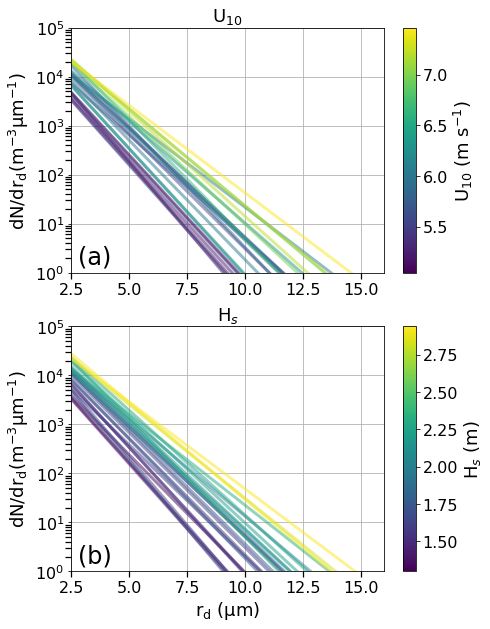

In [6]:
plt7_wind = pd.read_csv('plt7_wind.csv')
plt7_waves = pd.read_csv('plt7_waves.csv')
plt7_wind['y_vals'] = plt7_wind['y_vals'].apply(literal_eval)
plt7_waves['y_vals'] = plt7_waves['y_vals'].apply(literal_eval)

fig = plt.figure(figsize = [7, 10])
gs = gridspec.GridSpec(22, 6)
gs.update(wspace=0.5)
ax = plt.subplot(gs[0:10, :])
ax2 = plt.subplot(gs[12:, :])

a = 18
b = 18
w = 1.25

x = np.linspace(0, 16, 2000)
n = len(plt7_wind)
colors = plt.get_cmap('viridis')
norm = plt.Normalize(plt7_wind['windspeed'].min(), plt7_wind['windspeed'].max())
inlist = plt7_wind.index.tolist()
for i in inlist:
    wind = plt7_wind['windspeed'][i]
    ax.plot(x, plt7_wind['y_vals'][i], linewidth = 3, label = ["%.1f" % round(wind, 1) + ' m/s'], c = colors(norm(plt7_wind['windspeed'][i])), alpha = 0.5)#color = colors[i]

ax.set_title('$\mathrm{U_{10}}$', size = a)
ax.set_ylabel('dN/d$\mathrm{r_d}$($\mathrm{m^{-3} \u03BCm^{-1}}$)', size = b)
ax.set_xlim(left=2.5, right=16) # limits on x-axis
ax.set_ylim(bottom=1, top=100000)
ax.set_yscale('log')
ax.annotate('(a)', xy=[2.8, 1.5], fontsize =24, c= 'black')
ax.tick_params(axis='x', length = 6, width = w)
ax.tick_params(axis='y', labelsize= 12)
ax.tick_params(axis='y', which = 'minor', length = 6, width = w, labelsize= 12)
norm = mpl.colors.Normalize(vmin=plt7_wind['windspeed'].min(),vmax=plt7_wind['windspeed'].max())
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
ax.tick_params(axis='x', labelsize= 16)
ax.tick_params(axis='y', labelsize= 16)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('$\mathrm{U_{10}}$ (m $\mathrm{s^{-1}}$)', fontsize = b)
ax.grid()

x = np.linspace(0, 16, 2000)
n = len(plt7_waves)
colors = plt.get_cmap('viridis')
norm = plt.Normalize(plt7_waves['sig_wave_height'].min(), plt7_waves['sig_wave_height'].max())
inlist = plt7_waves.index.tolist()
for i in inlist:
    wind = plt7_waves['sig_wave_height'][i]
    ax2.plot(x, plt7_waves['y_vals'][i], linewidth = 3, label = ["%.1f" % round(wind, 1) + ' m/s'], c = colors(norm(plt7_waves['sig_wave_height'][i])), alpha = 0.5)

ax2.set_title('H$_{s}$', size = a)
ax2.set_ylabel('dN/d$\mathrm{r_d}$($\mathrm{m^{-3} \u03BCm^{-1}}$)', size = b)
ax2.set_xlabel('$\mathrm{r_d}$ (\u03BCm)', size = b)
ax2.set_xlim(left=2.5, right=16) 
ax2.set_ylim(bottom=1, top=100000)
ax2.annotate('(b)', xy=[2.8, 1.5], fontsize =24, c= 'black')
ax2.set_yscale('log')
ax2.tick_params(axis='x', length = 6, width = w)
ax2.tick_params(axis='y', labelsize= 12)
ax2.tick_params(axis='y', which = 'minor', length = 6, width = w, labelsize= 12)
norm = mpl.colors.Normalize(vmin=plt7_waves['sig_wave_height'].min(),vmax=plt7_waves['sig_wave_height'].max())
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2)
ax2.tick_params(axis='x', labelsize= 16)
ax2.tick_params(axis='y', labelsize= 16)
cbar.ax.tick_params(labelsize=16)
cbar.set_alpha(0.5)
cbar.set_label('H$_{s}$ (m)', fontsize = b)
ax2.grid()

# Plt. 8 Partial Correlations


r_bc = 0.8483527163207811
Pearsons r between wind and r2.8: 0.8648449393728911
Pearsons r between waves and r2.8: 0.9051567094333007
Partial Correlation of Wind on r2.6: 0.4308061481301155
********************************   
Pearsons r between wind and B: 0.6771682451239847
Pearsons r between waves and B: 0.7869601917590238
Partial Correlation of Wind on Exponential Slope: 0.029230372606077817
********************************     
Pearsons r between wind and y10: 0.739194812513275
Pearsons r between waves and y10: 0.7958495176621084
Partial Correlation of wind on particles > 10 um: 0.19975090795424688
********************************     
Pearsons r between wind and r2.8: 0.8648449393728911
Pearsons r between waves and r2.8: 0.9051567094333007
Partial Correlation of Waves on r2.6: 0.645094814899805
********************************   
Pearsons r between wind and B: 0.6771682451239847
Pearsons r between waves and B: 0.7869601917590238
Partial Correlation of Waves on Exponential Slope: 0.

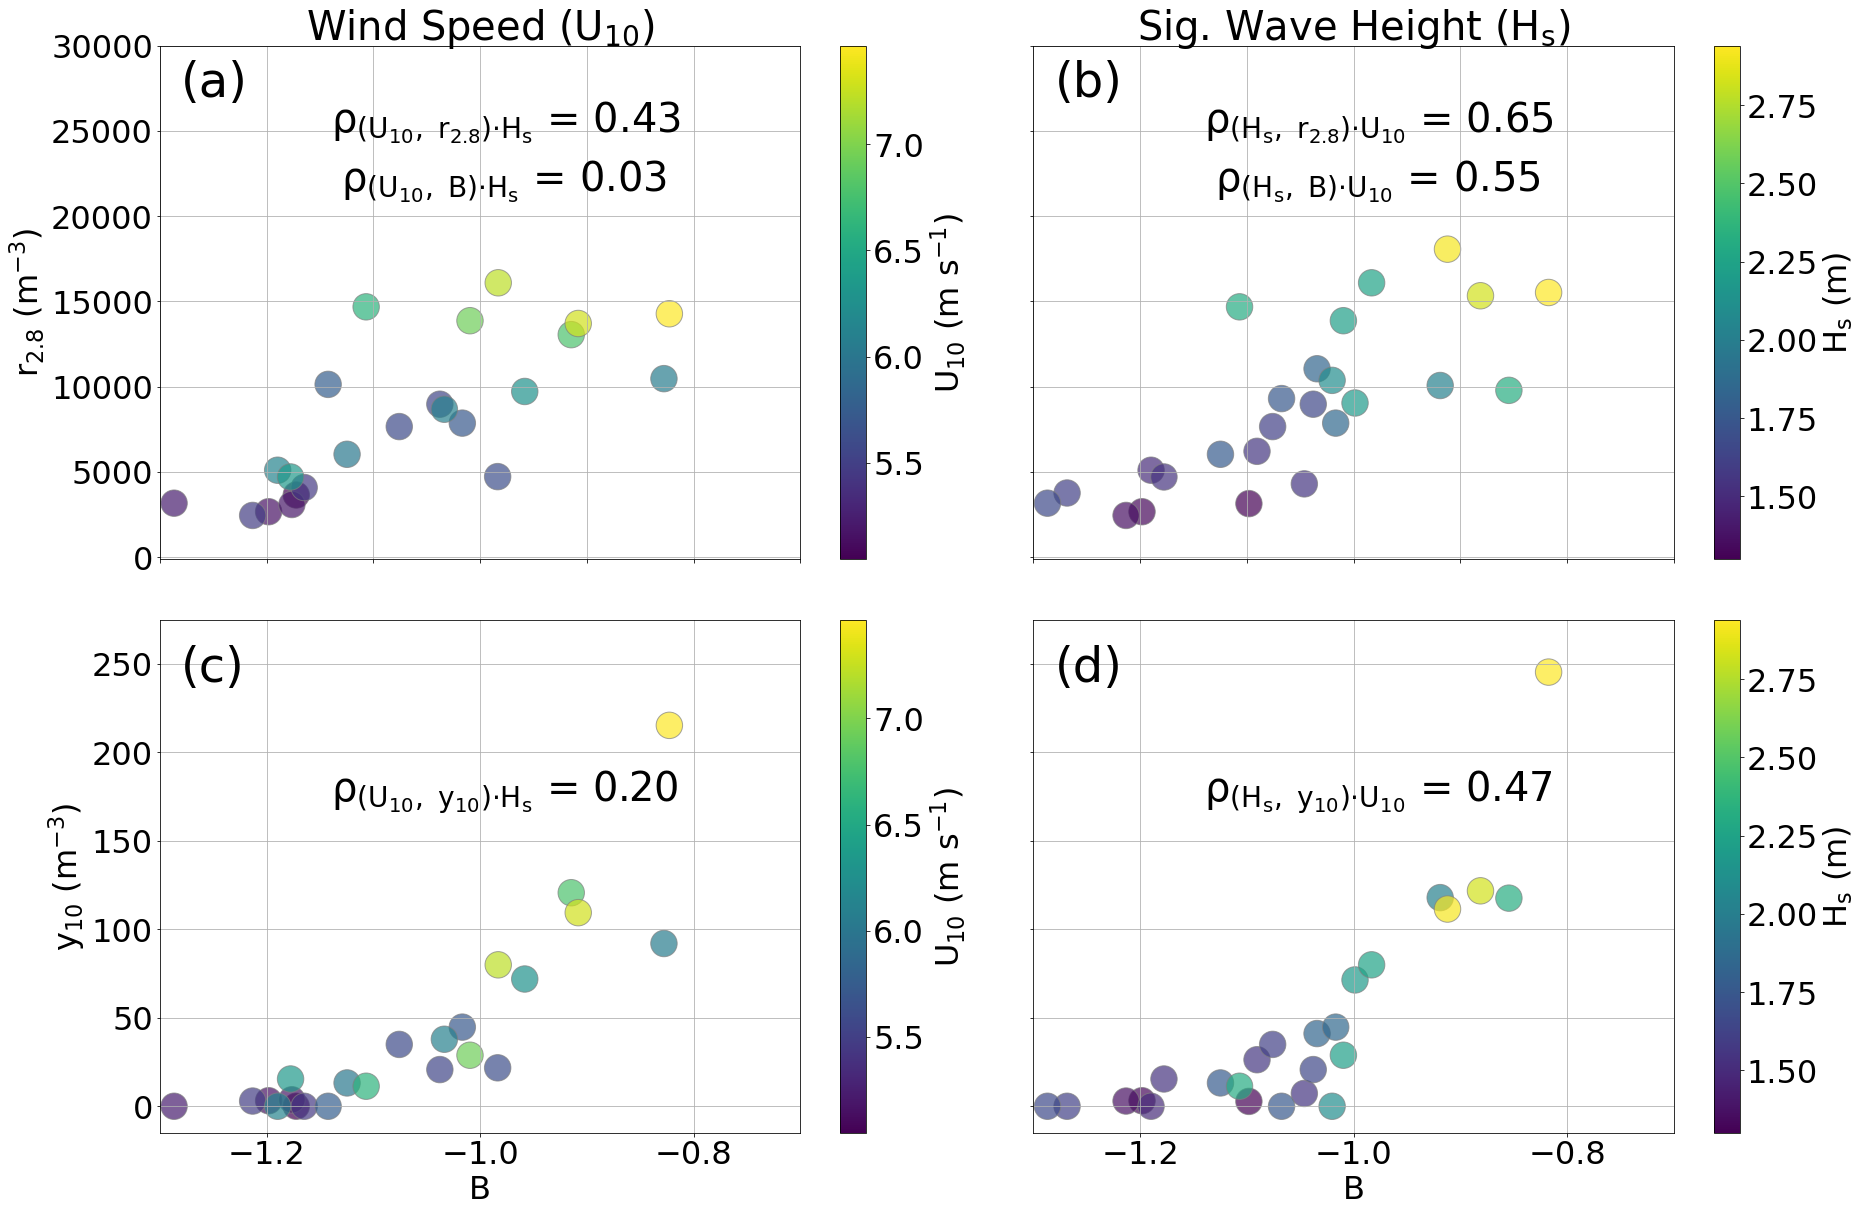

In [7]:
plt8_wind = pd.read_csv('plt8_wind.csv')
plt8_waves = pd.read_csv('plt8_waves.csv')

rbc = 0.8483527163207811
print(f'r_bc = {rbc}')


rab, _ = pearsonr(plt8_wind['windspeed'], plt8_wind['r26'])
rac, _ = pearsonr(plt8_waves['sig_wave_height'], plt8_waves['r26'])
print(f'Pearsons r between wind and r2.8: {rab}')
print(f'Pearsons r between waves and r2.8: {rac}')
rabc_windr26 = (rab - (rac*rbc))/(np.sqrt(1-(rac**2))*(np.sqrt(1-(rbc**2))))
print('Partial Correlation of Wind on r2.6: ' +str(rabc_windr26))
print('********************************   ')

rab, _ = pearsonr(plt8_wind['windspeed'], plt8_wind['decay_coefficient'])
rac, _ = pearsonr(plt8_waves['sig_wave_height'], plt8_waves['decay_coefficient']) # this is waves
print(f'Pearsons r between wind and B: {rab}')
print(f'Pearsons r between waves and B: {rac}')
rabc_windslope = (rab - (rac*rbc))/(np.sqrt(1-(rac**2))*(np.sqrt(1-(rbc**2))))
print('Partial Correlation of Wind on Exponential Slope: ' +str(rabc_windslope))
print('********************************     ')

rab, _ = pearsonr(plt8_wind['windspeed'], plt8_wind['y10'])
rac, _ = pearsonr(plt8_waves['sig_wave_height'], plt8_waves['y10'])
print(f'Pearsons r between wind and y10: {rab}')
print(f'Pearsons r between waves and y10: {rac}')
rabc_windy10 = (rab - (rac*rbc))/(np.sqrt(1-(rac**2))*(np.sqrt(1-(rbc**2))))
print('Partial Correlation of wind on particles > 10 um: ' +str(rabc_windy10))
print('********************************     ')

rab, _ = pearsonr(plt8_waves['sig_wave_height'], plt8_waves['r26'])
rac, _ = pearsonr(plt8_wind['windspeed'], plt8_wind['r26']) # this is waves
print(f'Pearsons r between wind and r2.8: {rac}')
print(f'Pearsons r between waves and r2.8: {rab}')
rabc_wavesr26 = (rab - (rac*rbc))/(np.sqrt(1-(rac**2))*(np.sqrt(1-(rbc**2))))
print('Partial Correlation of Waves on r2.6: ' +str(rabc_wavesr26))
print('********************************   ')

rab, _ = pearsonr(plt8_waves['sig_wave_height'], plt8_waves['decay_coefficient'])
rac, _ = pearsonr(plt8_wind['windspeed'], plt8_wind['decay_coefficient']) # this is waves
print(f'Pearsons r between wind and B: {rac}')
print(f'Pearsons r between waves and B: {rab}')
rabc_wavesslope = (rab - (rac*rbc))/(np.sqrt(1-(rac**2))*(np.sqrt(1-(rbc**2))))
print('Partial Correlation of Waves on Exponential Slope: ' +str(rabc_wavesslope))
print('********************************   ')

rab, _ = pearsonr(plt8_waves['sig_wave_height'], plt8_waves['y10'])
rac, _ = pearsonr(plt8_wind['windspeed'], plt8_wind['y10']) # this is waves
print(f'Pearsons r between wind and y10: {rac}')
print(f'Pearsons r between waves and y10: {rab}')
rabc_wavesy10 = (rab - (rac*rbc))/(np.sqrt(1-(rac**2))*(np.sqrt(1-(rbc**2))))
print('Partial Correlation of Waves on particles > 10 um: ' +str(rabc_wavesy10))
########################################################################################################
########################################################################################################
##################################################PLOT##################################################
########################################################################################################
########################################################################################################
fig, ax = plt.subplots(figsize = [30, 20])
gs = gridspec.GridSpec(21, 8)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0:10, :4], )
ax2 = plt.subplot(gs[0:10, 4:])
ax3 = plt.subplot(gs[11:, :4])
ax4 = plt.subplot(gs[11:, 4:])
wind = plt8_wind.copy()
waves = plt8_waves.copy()
b = 16*2
c= 24*2
l = 'viridis'
s = 6000*5
d = 700
e = 20*2
####################################################################################
scatter = ax1.scatter(wind['decay_coefficient'], wind['r26'], s = d,c = wind['windspeed'], 
            cmap = l,  edgecolors='grey', alpha = 0.7)
ax1.grid()
ax1.tick_params(axis = 'x', labelbottom = False)
ax1.tick_params(axis = 'y', labelsize = b)
ax1.set_xlim(left=-1.3, right=-.7) 
ax1.set_ylim(bottom=-100, top=s)
norm = mpl.colors.Normalize(vmin=wind['windspeed'].min(),vmax=wind['windspeed'].max())
sm = plt.cm.ScalarMappable(cmap=l, norm = norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1)
cbar.set_label('$\mathrm{U_{10}}$ (m $\mathrm{s^{-1}}$)', fontsize = b)
cbar.ax.tick_params(labelsize=b)

ax1.set_ylabel('r$_{2.8}$ ($\mathrm{m^{-3}}$)',fontsize =b)
ax1.set_title('Wind Speed ($\mathrm{U_{10})}$', fontsize = e)
ax1.annotate( '(a)', xy = (-1.28, 5400*5),fontsize = c)
ax1.annotate( '$\mathrm{\u03C1_{(U_{10},\ r_{2.8})\u22c5 H_s}}$ = %.2f'%(rabc_windr26), xy = (-1.14, 5000*5),fontsize = e)
ax1.annotate( '$\mathrm{\u03C1_{(U_{10},\  B)\u22c5 H_s}}$ = %.2f'%(rabc_windslope), xy = (-1.13, 4300*5),fontsize = e)
####################################################################################
scatter = ax2.scatter(waves['decay_coefficient'], waves['r26'], s = d,c = waves['sig_wave_height'], 
            cmap = l,  edgecolors='grey', alpha = 0.7)
ax2.grid()
ax2.tick_params(axis = 'x', labelbottom = False)
ax2.tick_params(axis = 'y',  labelleft = False)
ax2.set_xlim(left=-1.3, right=-.7) 
ax2.set_ylim(bottom=-100, top=s)
norm = mpl.colors.Normalize(vmin=waves['sig_wave_height'].min(),vmax=waves['sig_wave_height'].max())
sm = plt.cm.ScalarMappable(cmap=l, norm = norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2)
cbar.set_label('$\mathrm{H_s}$ (m)', fontsize = b)
cbar.ax.tick_params(labelsize=b)
ax2.set_title('Sig. Wave Height ($\mathrm{H_s}$)', fontsize = e)
ax2.annotate( '(b)', xy = (-1.28, 5400*5),fontsize = c)
ax2.annotate( '$\mathrm{\u03C1_{(H_s,\ r_{2.8})\u22c5 U_{10}}}$ = %.2f'%(rabc_wavesr26), xy = (-1.14, 5000*5),fontsize = e)
ax2.annotate( '$\mathrm{\u03C1_{(H_s,\  B)\u22c5 U_{10}}}$ = %.2f'%(rabc_wavesslope), xy = (-1.13, 4300*5),fontsize = e)
####################################################################################

scatter = ax3.scatter( wind['decay_coefficient'],wind['y10'], s = d, c = wind['windspeed'], 
            cmap = l,  edgecolors='grey', alpha = 0.7)
ax3.grid()
ax3.tick_params(axis = 'x', labelsize = b)
ax3.tick_params(axis = 'y', labelsize = b)
ax3.set_xlim(-1.3, -.7) 
ax3.set_ylim(-3*5, 55*5)
norm = mpl.colors.Normalize(vmin=wind['windspeed'].min(),vmax=wind['windspeed'].max())
sm = plt.cm.ScalarMappable(cmap=l, norm = norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax3)
cbar.set_label('$\mathrm{U_{10}}$ (m $\mathrm{s^{-1}}$)', fontsize = b)
cbar.ax.tick_params(labelsize=b)
ax3.set_ylabel('$\mathrm{y_{10}}$ ($\mathrm{m^{-3}}$)', fontsize =b)
ax3.set_xlabel('B', fontsize =b)
ax3.annotate( '(c)', xy = (-1.28, 48*5),fontsize = c)
ax3.annotate( '$\mathrm{\u03C1_{(U_{10},\ y_{10})\u22c5 H_s}}$ = %.2f'%(rabc_windy10), xy = (-1.14, 34.5*5),fontsize = e)

####################################################################################
scatter = ax4.scatter(waves['decay_coefficient'], waves['y10'], s = d,c = waves['sig_wave_height'], 
            cmap = l,  edgecolors='grey', alpha = 0.7)
ax4.grid()
ax4.tick_params(axis = 'x', labelsize = b)
ax4.tick_params(axis = 'y', labelleft = False)
ax4.set_xlim(-1.3, -.7) 
ax4.set_ylim(-3*5, 55*5)
norm = mpl.colors.Normalize(vmin=waves['sig_wave_height'].min(),vmax=waves['sig_wave_height'].max())
sm = plt.cm.ScalarMappable(cmap=l, norm = norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax4)
cbar.set_label('$\mathrm{H_s}$ (m)', fontsize = b)
cbar.ax.tick_params(labelsize=b)
ax4.set_xlabel('B', fontsize =b)
ax4.annotate( '(d)', xy = (-1.28, 48*5),fontsize = c)
ax4.annotate( '$\mathrm{\u03C1_{(H_s,\ y_{10})\u22c5 U_{10}}}$ = %.2f'%(rabc_wavesy10), xy = (-1.14, 34.5*5),fontsize = e)
plt.show()

# Plt. 9 - Average Mass and SSA-SD by Altitude

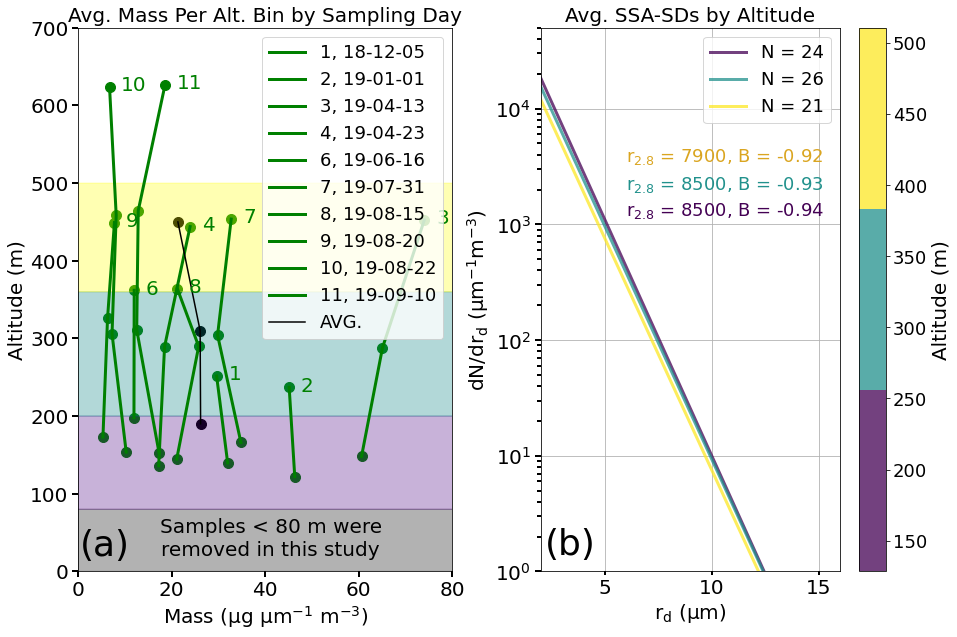

In [9]:
fig, ax = plt.subplots(figsize = (15, 10))
gs = gridspec.GridSpec(5, 13)
gs.update(wspace=0.5)
ax = plt.subplot(gs[0:5, :6])
ax2 = plt.subplot(gs[0:5, 7:])

ax.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

df1_alt = pd.read_csv('plt9a_alt.csv')
df1_mass = pd.read_csv('plt9a_mass.csv')

date_list = list(df1_mass['date'])
samp_list = list(df1_mass['samp_day'])

mass_arr = df1_mass.drop(columns = ['date', 'samp_day']).to_numpy()
alt_arr = df1_alt.drop(columns = ['date', 'samp_day']).to_numpy()

for k in np.arange(0, 10): 
    sampdate = samp_list[k]
    date = date_list[k]
    top = len(mass_arr[k][np.isfinite(mass_arr[k])])
    ax.scatter(mass_arr[k, :], alt_arr[k, :], s = 100, color = 'green')
    ax.plot(mass_arr[k, :], alt_arr[k, :],label = str(sampdate)+", " + str(date[2:10]), linewidth = 3, color = 'green')
    ax.annotate(str(sampdate), xy = [mass_arr[k, top-1]+2.5, alt_arr[k,top-1]-5], fontsize = '20', color = 'green')
ax.plot([5.241335706733497*5, 5.220584386788961*5, 4.2702787197791805*5], [190, 310, 450], label = 'AVG.', color = 'black')
ax.scatter([5.241335706733497*5, 5.220584386788961*5, 4.2702787197791805*5], [190, 310, 450],  color = 'black', s = 100)

y0 = np.zeros(20000)
y = y0+80
y1 = np.zeros(20000)
y1 = y1+450
y2 = y1+175
y1 = np.zeros(20000)
b1 = y1+80
y1 = np.zeros(20000)
b2 = y1+200
y1 = np.zeros(20000)
b3 = y1+360
y1 = np.zeros(20000)
b4 = y1+500
ax.fill_between(np.arange(0, 20000), y0,y, color = 'black', alpha = 0.3)
ax.fill_between(np.arange(0, 20000), b1,b2, color = 'indigo', alpha = 0.3)
ax.fill_between(np.arange(0, 20000), b2,b3, color = 'teal', alpha = 0.3)
ax.fill_between(np.arange(0, 20000), b3,b4, color = 'yellow', alpha = 0.3)
ax.legend(loc = 'upper right', fontsize = 18)
ax.set_title('Avg. Mass Per Alt. Bin by Sampling Day', fontsize = 20)
ax.set_ylabel('Altitude (m)', fontsize = 20)
ax.set_xlabel('Mass (\u03BCg $\mathrm{\u03BCm^{-1}\ m^{-3}}$)', fontsize = 20)
ax.set_xlim(left=0, right=16*5)
ax.set_ylim(bottom = 0, top = 700)
ax.annotate('(a)', xy=[.5, 20], fontsize =36, c= 'black')
ax.annotate('Samples < 80 m were ', xy=[3.5*5, 50], fontsize =20, c= 'black')
ax.annotate('removed in this study', xy=[3.55*5, 20], fontsize =20, c= 'black')
ax.tick_params('y',  length = 6, width =2)
ax.tick_params('x', length = 6, width = 2)

###########################################################################################################################
df2 = pd.read_csv('plt9b_SSASD.csv')
df2['y_vals'] = df2['y_vals'].apply(literal_eval)

x = np.linspace(0, 16, 2000)
n = len(df2)
colors = plt.get_cmap('viridis', n)
inlist = df2.index.tolist()
for i in inlist:
    alt = df2['alt'][i]
    r = df2['r2_value'][i]
    r26 = df2['r26'][i]
    B = df2['decay_coefficient'][i]
    sampnum = df2['numsamp'][i]
    ax2.plot(x, df2['y_vals'][i], linewidth = 3, label = "N = %d" %(sampnum), c = colors(i), alpha = 0.75)
    if i == 0: 
        ax2.annotate('$\mathrm{r_{2.8}}$ = %d, B = %.2f'%(np.round_(r26, -2), B),xy=(6,1200), size = 18, c = colors(i))
    elif i == 1:     
        ax2.annotate('$\mathrm{r_{2.8}}$ = %d, B = %.2f'%(np.round_(r26, -2), B),xy=(6,2000), size = 18, c = colors(i))
    else:
        ax2.annotate('$\mathrm{r_{2.8}}$ = %d, B = %.2f'%(np.round_(r26, -2), B),xy=(6,3500), size = 18, c = 'goldenrod')
        
ax2.set_title('Avg. SSA-SDs by Altitude', size = 20)
ax2.set_ylabel('dN/d$\mathrm{r_d}$ (\u03BC$\mathrm{m^{-1} m^{-3}}$)', size = 20)
ax2.set_xlabel('$\mathrm{r_d}$ (\u03BCm)', size = 20)
ax2.set_xlim(left=2, right=16)
ax2.set_ylim(bottom = 1, top = 50000)
ax2.annotate('(b)', xy=[2.2, 1.4], fontsize =36, c= 'black')
ax2.set_yscale('log')
ax2.legend(fontsize = 18)
ax2.tick_params('y',  length = 6, width =2)
ax2.tick_params('y', which = 'minor', length = 4, width =2)
ax2.tick_params('x', length = 4, width = 2)
norm = mpl.colors.Normalize(vmin=128.4,vmax=510.6)
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2, alpha = 0.75)
cbar.ax.tick_params(labelsize=18)
cbar.set_label("Altitude (m)", fontsize = 20)

ax2.grid()
plt.show()

# Plt. 10 - Comparing Altitudes of OCEAN to COAST 

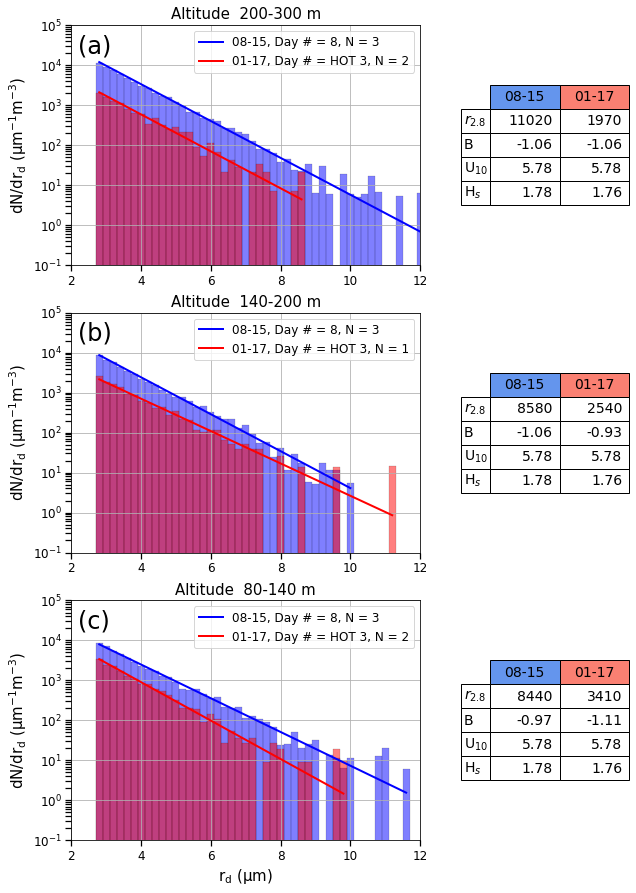

In [10]:
df1 = pd.read_csv('plt10_cst_data.csv')
df2 = pd.read_csv('plt10_ocn_data.csv')

df1['bin_middle'] = df1['bin_middle'].apply(literal_eval)
df2['bin_middle'] = df2['bin_middle'].apply(literal_eval)

df1['bin_conc'] = df1['bin_conc'].apply(literal_eval)
df2['bin_conc'] = df2['bin_conc'].apply(literal_eval)

def grid_of_2_SDs_cont(DF1, DF2, rows, cols, width, length, bin1, bin2, bin3, bin4):
    bins1 = pd.cut(DF1['altitude'], [bin1, bin2, bin3, bin4])
    bins2 = pd.cut(DF2['altitude'], [bin1, bin2, bin3, bin4])
    var = 'altitude'
    dfgroups1 = DF1.groupby(bins1)
    dfgroups2 = DF2.groupby(bins2)
    w1 = DF1['wspd_wf_calc'].mean()
    w2 = DF2['u10_wind'].mean()
    waves2 = DF2['wave_height'].mean()
    n = 1    
    b = 15
    rsquare = []
    fcoef = []
    decaycoef = []
    windgroup = []
    r26 = []
    fig = plt.figure(figsize = [width, length])
    gs = gridspec.GridSpec(3, 3)
    gs.update(wspace=0.5)
###########################################################
    n = 3
    r26 = []
    bs = []
    winds = []
    waves = []
    for name, group in dfgroups1: 
        wind_val = getattr(group, var).mean()
        numsamp = len(group)
        sampdate = getattr(group, 'date').min()
        sampdate = str(sampdate)
        sampnum = getattr(group, 'sampdate').min()
        numsamp = len(group)
        wndspd = getattr(group, 'wspd_wf_calc').mean()
        shgt = getattr(group, 'moka_shgt').mean()
        conclist = []
        tracelist = []
        for row in group.itertuples():
            conc = getattr(row, 'bin_conc')
            if len(conc) < 96:
                conc += [0] * (96-len(conc))
            conclist.append(conc)
        conc_arrays = [np.array(item) for item in conclist]
        x = df1['bin_middle'].iloc[0]
        y = [np.mean(item) for item in zip(*conc_arrays)] 
        x_nonempty = np.asarray([item for item,count in zip(x,y) if count>0.0]) 
        y_nonempty = np.asarray([count for count in y if count>0.0])
        cutoff_bin = np.where(x_nonempty ==2.8)
        cutoff = int(cutoff_bin[0])
        x_nonempty = x_nonempty[cutoff:]
        y_nonempty = y_nonempty[cutoff:] 
        x_nonempty_cont = x[10:]
        y_nonempty_cont = y[10:]
        y_26 = y[10]*5
        y_cont = []
        for i in y_nonempty_cont: 
            if i > 0: 
                y_cont.append(i)
            else: 
                break
        x_cont = x_nonempty_cont[:len(y_cont)]
        y_log = np.log(y_cont)
        model, residuals, rank, singular_values, rcond = np.polyfit(x_cont, y_log, 1, full=True)
        decay_coefficient = model[0]
        a_log = model[1]
        function_coefficient = np.exp(a_log)
        p = np.poly1d(model)
        yfit = p(x_cont)
        ybar = np.sum(y_log)/len(y_log)
        ssres = np.sum((y_log-yfit)**2)
        sstot = np.sum((y_log-ybar)**2)
        r2_value = 1 - ssres/sstot
        y = np.asarray(y)
        function_coefficient = 5*function_coefficient
        y_exponential = function_coefficient*np.exp(decay_coefficient*x_nonempty)
        r26.append(y_26)
        bs.append(decay_coefficient)
        winds.append(wndspd)
        waves.append(shgt)
        ax = plt.subplot(gs[n-1, 0:2])
        ax.grid()
        ax.bar(x=x_nonempty, height=y_nonempty*5, width=0.2, color='blue', edgecolor='black', linewidth=0.25, alpha=0.5)
        ax.plot(x_nonempty, y_exponential, 'b-', linewidth=2, label = str(sampdate[5:10])+', Day # = '+str(sampnum)+', N = '+str(numsamp))

        if n == 1:  
            ax.set_title(f'Altitude  {bin1}-{bin2} m', size = b)
        elif n ==2: 
            ax.set_title(f'Altitude  {bin2}-{bin3} m', size = b)
        elif n ==3:
            ax.set_title(f'Altitude  {bin3}-{bin4} m', size = b)
        n = n-1
###########################################################
    n = 3
    r262 = []
    bs2 = []
    winds2 = []
    waves2 = []
    for name, group in dfgroups2: 
        wind_val = getattr(group, var).mean()
        sampdate2 = getattr(group, 'date').min()
        sampdate2 = str(sampdate2)
        sampnum = getattr(group, 'date').min()
        numsamp2 = len(group)
        wndspd2 = getattr(group, 'u10_wind').mean()
        shgt2 = getattr(group, 'wave_height').mean()
        conclist = []
        tracelist = []
        for row in group.itertuples():
            conc = getattr(row, 'bin_conc')
            if len(conc) < 96:
                conc += [0] * (96-len(conc))
            conclist.append(conc)
        conc_arrays = [np.array(item) for item in conclist]
        x2 = df1['bin_middle'].iloc[0]
        y2 = [np.mean(item) for item in zip(*conc_arrays)]  
        x_nonempty2 = np.asarray([item for item,count in zip(x2,y2) if count>0.0]) 
        y_nonempty2 = np.asarray([count for count in y2 if count>0.0])
        cutoff_bin = np.where(x_nonempty2 == 2.8)
        cutoff = int(cutoff_bin[0])
        x_nonempty2 = x_nonempty2[cutoff:]
        y_nonempty2 = y_nonempty2[cutoff:]
        y_cutoff2 = y2[10:]
        x_cutoff2 = x2[10:]
        y_262 = y2[10]*5
        x_nonempty_cont2 = x2[10:] 
        y_nonempty_cont2 = y2[10:]
        y_cont2 = []
        for i in y_nonempty_cont2: 
            if i > 0: 
                y_cont2.append(i)
            else: 
                break
        x_cont2 = x_nonempty_cont2[:len(y_cont2)]
        y_log2 = np.log(y_cont2)
        model2, residuals2, rank2, singular_values2, rcond2 = np.polyfit(x_cont2, y_log2, 1, full=True)
        decay_coefficient2 = model2[0]
        a_log2 = model2[1]
        function_coefficient2 = np.exp(a_log2)
        p2 = np.poly1d(model2)
        yfit2 = p2(x_cont2)
        ybar2 = np.sum(y_log2)/len(y_log2)
        ssres2 = np.sum((y_log2-yfit2)**2)
        sstot2 = np.sum((y_log2-ybar2)**2)
        r2_value2 = 1 - ssres2/sstot2
        y2 = np.asarray(y2)
        function_coefficient2 = 5*function_coefficient2
        y_exponential2 = function_coefficient2*np.exp(decay_coefficient2*x_nonempty2)
        r262.append(y_262)
        bs2.append(decay_coefficient2)
        winds2.append(wndspd2)
        waves2.append(shgt2)
        ax = plt.subplot(gs[n-1, 0:2])
        ax.grid()
        ax.bar(x=x_nonempty2, height=y_nonempty2*5, width=0.2, color='red', edgecolor='black', linewidth=0.25, alpha=0.5)
        ax.plot(x_nonempty2, y_exponential2, 'r-', linewidth=2, label = str(sampdate2[5:10])+', Day # = HOT 3'+', N = '+str(numsamp2))
        ax.set_yscale('log')
        ax.set_xlim(left=2, right=12)
        ax.tick_params('y', which = 'minor', width = 1.25, length = 6)
        ax.tick_params('x',  width = 1.25, length = 6, labelsize = 12)
        ax.tick_params('y',  width = 1.25, length = 6, labelsize = 12)
        ax.set_ylim(bottom=0.1, top=100000)
        ax.set_ylabel('dN/d$\mathrm{r_d}$ (\u03BC$\mathrm{m^{-1} m^{-3}}$)', size = b)
        ax.legend(fontsize = 12)
        ax.grid()
        fig.patch.set_visible(False)
        ax2 = plt.subplot(gs[n-1, 2:])
        ax2.axis('off')
        ax2.axis('tight')
        rows = ['${r_{2.8}}$', 'B', 'U$_{10}$', 'H$_{s}$']
        colus =[str(sampdate[5:10]), str(sampdate2[5:10])]
        celltext = [[int(np.round_(r26[np.abs(n-3)], -1)), int(np.round_(r262[np.abs(n-3)], -1))], 
                    [np.round_(bs[np.abs(n-3)], 2), np.round_(bs2[np.abs(n-3)], 2)], 
                    [5.78, 5.78], 
                    [np.round_(waves[np.abs(n-3)],2), 1.76]]  
        thetable = ax2.table(cellText=celltext,
                      rowLabels=rows,
                      colLabels=colus, colColours = ['cornflowerblue', 'salmon'],
                      loc = 'center')
        thetable.auto_set_font_size(False)
        thetable.set_fontsize(14)
        thetable.scale(1, 2)
        if n == 1:  
            ax.set_title(f'Altitude  {bin3}-{bin4} m', size = b)
            ax.annotate( '(a)', xy = (2.2, 20000),fontsize = 24)
            
        elif n ==2: 
            ax.set_title(f'Altitude  {bin2}-{bin3} m', size = b)
            ax.annotate( '(b)', xy = (2.2, 20000),fontsize = 24)
        elif n ==3:
            ax.set_title(f'Altitude  {bin1}-{bin2} m', size = b)
            ax.annotate( '(c)', xy = (2.2, 20000),fontsize = 24)
            ax.set_xlabel('$\mathrm{r_d}$ (\u03BCm)', size = b)
        elif n ==4:
            ax.set_title(f'Altitude  {bin4}-{bin5} m', size = b)    
        else:
            ax.set_title(f'Altitude  {bin5}-{bin6} m', size = b)
        n = n-1


grid_of_2_SDs_cont(DF1 = df1, DF2 = df2, rows = 3, cols = 1, width = 10, length = 15, bin1=80, bin2=140, bin3= 200, bin4= 300)